In [44]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\senay\Downloads\movies.csv')

In [19]:
#Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [20]:
#Lets see if there is any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [21]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [45]:
df = df.dropna()

In [46]:
#Change datatypes of Columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [47]:
#Create correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [27]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [59]:
# Order our Data a little bit to see

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [60]:
df = df.reindex(sorted(df.columns), axis=1)
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000,Two Prong Lesson,United States,Francesca Gregorini,Drama,5073,Tanner Hall,R,"January 15, 2015 (Sweden)",96.0,5.8,Rooney Mara,3500.0,Tatiana von Fürstenberg,2009,2015
2434,5000000,Trimark Pictures,United States,Stephen Cornwell,Action,2970,Philadelphia Experiment II,PG-13,"June 4, 1994 (South Korea)",97.0,4.5,Brad Johnson,1900.0,Wallace C. Bennett,1993,1994
3681,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Ginger Snaps,Not Rated,"May 11, 2001 (Canada)",108.0,6.8,Emily Perkins,43000.0,Karen Walton,2000,2001
272,800000,Embassy Pictures,United States,Charles Band,Horror,2270,Parasite,R,"March 12, 1982 (United States)",85.0,3.9,Robert Glaudini,2300.0,Alan J. Adler,1982,1982


In [54]:
#Drop any duplicates 
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,90000000,Columbia Pictures,United States,Adil El Arbi,Action,426505244,Bad Boys for Life,R,"January 17, 2020 (United States)",124.0,6.6,Will Smith,140000.0,Peter Craig,2020,2020
7649,85000000,Paramount Pictures,United States,Jeff Fowler,Action,319715683,Sonic the Hedgehog,PG,"February 14, 2020 (United States)",99.0,6.5,Ben Schwartz,102000.0,Pat Casey,2020,2020
7650,175000000,Universal Pictures,United States,Stephen Gaghan,Adventure,245487753,Dolittle,PG,"January 17, 2020 (United States)",101.0,5.6,Robert Downey Jr.,53000.0,Stephen Gaghan,2020,2020
7651,135000000,20th Century Studios,Canada,Chris Sanders,Adventure,111105497,The Call of the Wild,PG,"February 21, 2020 (United States)",100.0,6.8,Harrison Ford,42000.0,Michael Green,2020,2020


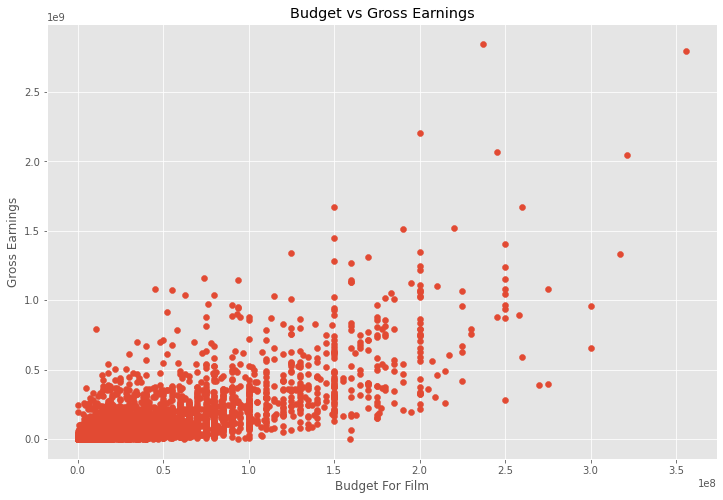

In [32]:
#Budget High Correlation
#Company High Correlation

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget For Film')

plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

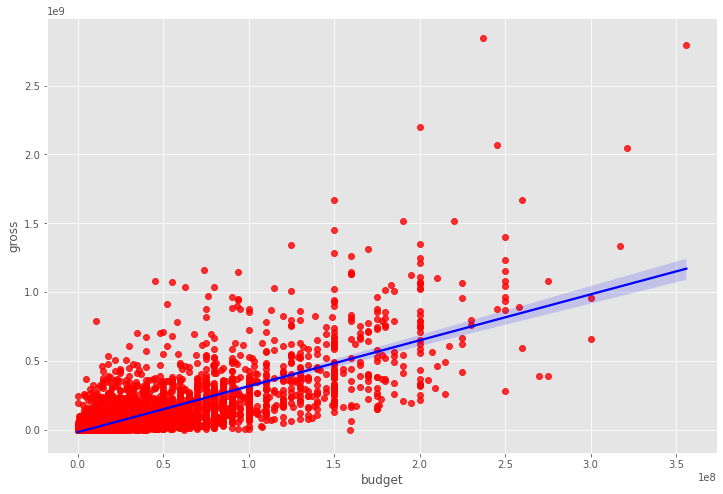

In [35]:
#Plot budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [36]:
#Lets start looking at correlation with all 3 methods
df.corr(method='pearson')

,budget,gross,runtime,score,votes,year,yearcorrect
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722,0.320312
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321,0.268721
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077,0.075294
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386,0.061923
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021,0.203098
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000,0.998726
yearcorrect,0.320312,0.268721,0.075294,0.061923,0.203098,0.998726,1.000000


In [39]:
df.corr(method='kendall')

,budget,gross,runtime,score,votes,year,yearcorrect
budget,1.000000,0.512057,0.231278,-0.006406,0.346274,0.220833,0.213719
gross,0.512057,1.000000,0.176979,0.124943,0.553625,0.239539,0.232372
runtime,0.231278,0.176979,1.000000,0.292254,0.205344,0.064824,0.064793
score,-0.006406,0.124943,0.292254,1.000000,0.350185,0.039389,0.043400
votes,0.346274,0.553625,0.205344,0.350185,1.000000,0.296512,0.293044
year,0.220833,0.239539,0.064824,0.039389,0.296512,1.000000,0.991304
yearcorrect,0.213719,0.232372,0.064793,0.043400,0.293044,0.991304,1.000000


In [40]:
df.corr(method='spearman')

,budget,gross,runtime,score,votes,year,yearcorrect
budget,1.000000,0.692958,0.330794,-0.009971,0.493461,0.312886,0.302535
gross,0.692958,1.000000,0.257400,0.183192,0.745793,0.351045,0.340529
runtime,0.330794,0.257400,1.000000,0.412155,0.300621,0.095444,0.095507
score,-0.009971,0.183192,0.412155,1.000000,0.495409,0.057741,0.063674
votes,0.493461,0.745793,0.300621,0.495409,1.000000,0.427623,0.422988
year,0.312886,0.351045,0.095444,0.057741,0.427623,1.000000,0.998694
yearcorrect,0.302535,0.340529,0.095507,0.063674,0.422988,0.998694,1.000000


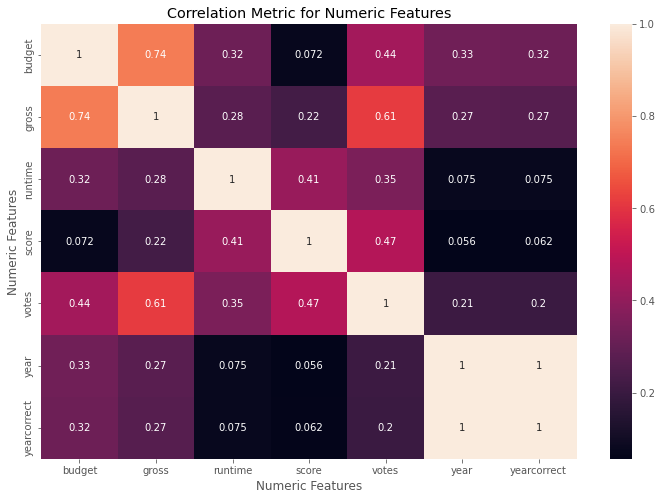

In [38]:
#High correlation between budget and gross

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)


plt.title('Correlation Metric for Numeric Features')

plt.xlabel('Numeric Features')

plt.ylabel('Numeric Features')

plt.show()

In [63]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtypes == 'object'): 
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,1382,47,785,0,2847246203,386,5,527,162.0,7.8,1534,1100000.0,1263,2009,2009
7445,356000000,983,47,105,0,2797501328,388,5,137,181.0,8.4,1470,903000.0,513,2019,2019
3045,200000000,1382,47,785,6,2201647264,4909,5,534,194.0,7.8,1073,1100000.0,1263,1997,1997
6663,245000000,945,47,768,0,2069521700,3643,5,529,138.0,7.8,356,876000.0,1806,2015,2015
7244,321000000,983,47,105,0,2048359754,389,5,145,149.0,8.4,1470,897000.0,513,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000,1385,47,585,6,5073,3794,6,890,96.0,5.8,1498,3500.0,2924,2009,2015
2434,5000000,1376,47,1805,0,2970,2969,5,1467,97.0,4.5,186,1900.0,3102,1993,1994
3681,5000000,466,6,952,6,2554,1595,3,1721,108.0,6.8,527,43000.0,1683,2000,2001
272,800000,582,47,261,9,2270,2909,6,1525,85.0,3.9,1473,2300.0,55,1982,1982


In [61]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000,Two Prong Lesson,United States,Francesca Gregorini,Drama,5073,Tanner Hall,R,"January 15, 2015 (Sweden)",96.0,5.8,Rooney Mara,3500.0,Tatiana von Fürstenberg,2009,2015
2434,5000000,Trimark Pictures,United States,Stephen Cornwell,Action,2970,Philadelphia Experiment II,PG-13,"June 4, 1994 (South Korea)",97.0,4.5,Brad Johnson,1900.0,Wallace C. Bennett,1993,1994
3681,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Ginger Snaps,Not Rated,"May 11, 2001 (Canada)",108.0,6.8,Emily Perkins,43000.0,Karen Walton,2000,2001
272,800000,Embassy Pictures,United States,Charles Band,Horror,2270,Parasite,R,"March 12, 1982 (United States)",85.0,3.9,Robert Glaudini,2300.0,Alan J. Adler,1982,1982


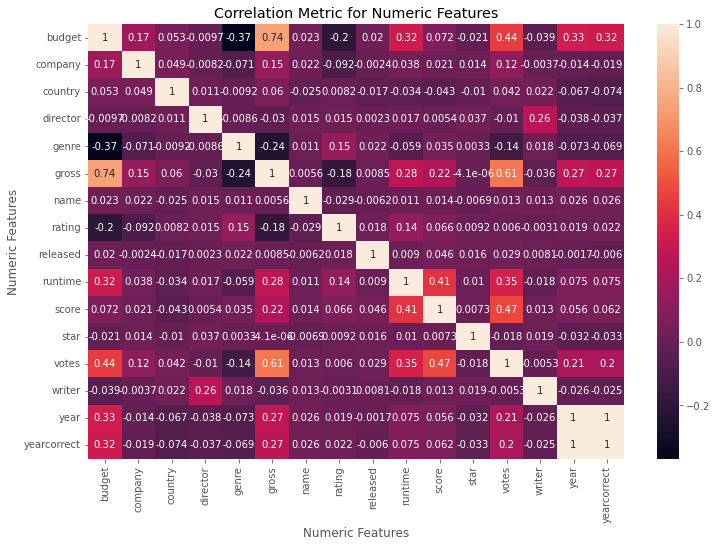

In [65]:
#High correlation between budget and gross using numerized columns

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)


plt.title('Correlation Metric for Numeric Features')

plt.xlabel('Numeric Features')

plt.ylabel('Numeric Features')

plt.show()

In [66]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
budget,1.000000,0.170235,0.052977,-0.009662,-0.368523,0.740247,0.023392,-0.203946,0.019952,0.318695,0.072001,-0.021473,0.439675,-0.039466,0.327722,0.320312
company,0.170235,1.000000,0.048569,-0.008223,-0.071334,0.149553,0.021697,-0.092357,-0.002407,0.037585,0.020656,0.014082,0.118470,-0.003697,-0.014333,-0.018806
country,0.052977,0.048569,1.000000,0.011133,-0.009164,0.060078,-0.025490,0.008230,-0.017228,-0.034477,-0.043051,-0.009990,0.041551,0.022488,-0.066748,-0.073569
director,-0.009662,-0.008223,0.011133,1.000000,-0.008553,-0.029560,0.015246,0.014656,0.002308,0.017433,0.005413,0.036593,-0.010376,0.261735,-0.038354,-0.037371
genre,-0.368523,-0.071334,-0.009164,-0.008553,1.000000,-0.244101,0.010996,0.147796,0.022142,-0.059237,0.035106,0.003341,-0.135990,0.017578,-0.073167,-0.069147
gross,0.740247,0.149553,0.060078,-0.029560,-0.244101,1.000000,0.005639,-0.181906,0.008501,0.275796,0.222556,-0.000004,0.614751,-0.035885,0.274321,0.268721
name,0.023392,0.021697,-0.025490,0.015246,0.010996,0.005639,1.000000,-0.029234,-0.006152,0.010850,0.014450,-0.006882,0.012615,0.012880,0.025542,0.025542
rating,-0.203946,-0.092357,0.008230,0.014656,0.147796,-0.181906,-0.029234,1.000000,0.018083,0.140792,0.065983,0.009196,0.006031,-0.003149,0.019499,0.022021
released,0.019952,-0.002407,-0.017228,0.002308,0.022142,0.008501,-0.006152,0.018083,1.000000,0.008975,0.045874,0.015706,0.028833,0.008072,-0.001740,-0.005989
runtime,0.318695,0.037585,-0.034477,0.017433,-0.059237,0.275796,0.010850,0.140792,0.008975,1.000000,0.414068,0.010108,0.352303,-0.017561,0.075077,0.075294


In [67]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs 

budget       budget         1.000000
             company        0.170235
             country        0.052977
             director      -0.009662
             genre         -0.368523
                              ...   
yearcorrect  star          -0.032687
             votes          0.203098
             writer        -0.025495
             year           0.998726
             yearcorrect    1.000000
Length: 256, dtype: float64

In [68]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
budget       rating        -0.203946
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [69]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
yearcorrect  year           0.998726
year         yearcorrect    0.998726
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Votes and budget have the highest correlation to gross earnings

#Company has low correlation
